In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:

!pip install snscrape
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 3.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-m8ji1_9f
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-m8ji1_9f
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 285d5874fc20a9d9463ed261f45c5f4118277d05
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import pandas as pd 

import numpy as np 

import snscrape.modules.twitter as sntwitter 

import datetime 

from tqdm.notebook import tqdm_notebook 

import seaborn as sns 

import matplotlib.pyplot as plt 

sns.set_theme(style="whitegrid") 

In [ ]:
text = input('Enter query text to be matched (or leave it blank by pressing enter)') 

username = input('Enter specific username(s) from a twitter account without @ (or leave it blank by pressing enter): ') 

since = input('Enter startdate in this format yyyy-mm-dd (or leave it blank by pressing enter): ') 

until = input('Enter enddate in this format yyyy-mm-dd (or leave it blank by pressing enter): ') 

count = input('Enter max number of tweets or enter -1 to retrieve all possible tweets: ')

retweet = input('Exclude Retweets? (y/n): ') 

replies = input('Exclude Replies? (y/n): ')

KeyboardInterrupt: ignored

In [ ]:
import datetime

def search(text, username='', since='', until='', retweet='n', replies='n'):
    global filename
    
    # Convert tuple arguments to strings
    if isinstance(text, tuple):
        text = ' '.join(text)
    if isinstance(username, tuple):
        username = ' '.join(username)
    if isinstance(since, tuple):
        since = ' '.join(since)
    if isinstance(until, tuple):
        until = ' '.join(until)
    
    q = text

    if username:
        q += f' from:{username}'

    if not since:
        since = (datetime.date.today() - datetime.timedelta(days=7)).strftime('%Y-%m-%d')
    q += f' since:{since}'

    if not until:
        until = datetime.date.today().strftime('%Y-%m-%d')
    q += f' until:{until}'

    if retweet == 'n':
        q += ' exclude:retweets'

    if replies == 'n':
        q += ' exclude:replies'

    # Generate filename based on search parameters
    if username and text:
        filename = f'{since}_{until}_{username}_{text}.csv'
    elif username:
        filename = f'{since}_{until}_{username}.csv'
    else:
        filename = f'{since}_{until}_{text}.csv'

    print(filename)
    return q


In [ ]:
from tqdm.notebook import tqdm_notebook
import pandas as pd


q = search(text, username, since, until, retweet, replies)

# Creating list to append tweet data
tweets_list1 = []

count = int(count)
# Using TwitterSearchScraper to scrape data and append tweets to list
if count == -1:
    for i, tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(q).get_items())):
        tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.lang, tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.media])
else:
    with tqdm_notebook(total=count) as pbar:
        for i, tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
            if i >= count:
                break
            tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.lang, tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.media])
            pbar.update()

# Creating a DataFrame from the tweets list above
tweets_df1 = pd.DataFrame(tweets_list1, columns=['DateTime', 'TweetId', 'Text', 'Username', 'Language', 'Hashtags', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'Media'])

# # Dropping duplicates based on tweet ID
# tweets_df1.drop_duplicates(subset='TweetId', keep='first', inplace=True)

# # Resetting index of the DataFrame
# tweets_df1.reset_index(drop=True, inplace=True)

# # Converting 'DateTime' column to datetime format
# tweets_df1['DateTime'] = pd.to_datetime(tweets_df1['DateTime'])

# # Setting 'TweetId' column as the index
# tweets_df1.set_index('TweetId', inplace=True)

# # Sorting the DataFrame by 'DateTime' column
# tweets_df1.sort_values(by='DateTime', inplace=True)

# Printing the first 5 rows of the DataFrame
print(tweets_df1)


In [ ]:
tweets_df1.to_csv("rwanda_finance.csv", index = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**MININFRA**

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/NLP-FELLOWSHIP/mininfra project/Dataset_Mininfra_cleaned.csv')

In [ ]:
data.head()

,ID,Date,User,Text,Language,Category,MentionedUser,Hashtag
0,1634453168246464512,2023-03-11 07:16:16+00:00,https://twitter.com/IRAKOZELionel15,@user twasabaga ababishinzwe kubaha umurongo n...,tl,mininifra,"[User(username='RwandaInfra', id=515653771, di...",NaN
1,1634453036310339586,2023-03-11 07:15:45+00:00,https://twitter.com/IRAKOZELionel15,@user bjr nibazaga ese imihembere yabakozi ba ...,tl,mininifra,"[User(username='RwandaInfra', id=515653771, di...",NaN
2,1634248640255369221,2023-03-10 17:43:33+00:00,https://twitter.com/Bonheur70149224,@user @user @user @user iki muragitwara trophy...,in,mininifra,"[User(username='RwandaInfra', id=515653771, di...",NaN
3,1634248563134791681,2023-03-10 17:43:14+00:00,https://twitter.com/Bonheur70149224,@user @user @user @user ndabona mwayemeje rwose,ht,mininifra,"[User(username='RwandaInfra', id=515653771, di...",NaN
4,1634176629067898883,2023-03-10 12:57:24+00:00,https://twitter.com/alinetwe_109,@user @user @user gaz methane,ht,mininifra,"[User(username='RwandaInfra', id=515653771, di...",NaN


In [ ]:
data_shuffled = data.sample(frac=1, random_state=1).reset_index()
data_shuffled.head()

,index,ID,Date,User,Text,Language,Category,MentionedUser,Hashtag
0,8561,1525922390747774976,2022-05-15 19:33:42+00:00,https://twitter.com/bwiza_rw,@user umaze kuza babikemuye,tr,reg,"[User(username='reg_rwanda', id=478609910, dis...",NaN
1,19211,1510918645567959045,2022-04-04 09:54:11+00:00,https://twitter.com/harerimana_tito,@user,qme,rwandair,"[User(username='FlyRwandAir', id=112440529, di...","['FlyTheDreamOfAfrica', 'FlySafeWithUs']"
2,4,1634176629067898883,2023-03-10 12:57:24+00:00,https://twitter.com/alinetwe_109,@user @user @user gaz methane,ht,mininifra,"[User(username='RwandaInfra', id=515653771, di...",NaN
3,18114,1551966554958487558,2022-07-26 16:23:55+00:00,https://twitter.com/nigeriansmiles,@user hello kidnappers @user release omotunde ...,en,rwandair,"[User(username='FlyRwandAir', id=112440529, di...",NaN
4,3403,1607722336387584001,2022-12-27 12:57:29+00:00,https://twitter.com/alinetwe_109,@user ku muhanda,in,reg,"[User(username='reg_rwanda', id=478609910, dis...",NaN


In [ ]:
data_shuffled.shape

(19885, 8)

In [ ]:
data_shuffled.tail()

,index,ID,Date,User,Text,Language,Category,MentionedUser,Hashtag
19880,10955,1493648349748031488,2022-02-15 18:08:11+00:00,https://twitter.com/tujyetwinkwera,@user kweri umupira uraducitse,tl,reg,"[User(username='reg_rwanda', id=478609910, dis...",NaN
19881,17289,1595798353635430400,2022-11-24 15:15:50+00:00,https://twitter.com/ade_harison,@user amazing,en,rwandair,"[User(username='FlyRwandAir', id=112440529, di...",NaN
19882,5192,1581960608181678080,2022-10-17 10:49:35+00:00,https://twitter.com/SylvaiNsenga,@user mwakoze baje kuhagera baradukorera byake...,und,reg,"[User(username='reg_rwanda', id=478609910, dis...",NaN
19883,12172,1622186056127856641,2023-02-05 10:51:09+00:00,https://twitter.com/nsabemy053,@user mwamfasha kumva impamvu itiyo itoboka um...,und,wasac,"[User(username='wasac_rwanda', id=2797437306, ...",NaN
19884,235,1488631229150900226,2022-02-01 21:51:57+00:00,https://twitter.com/rbBonaparte,@user @user @user congratulations clapping han...,en,mininifra,"[User(username='Eng_Patricie', id=237204810, d...",NaN


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=7b0fa170d9d98a667a450ebb68b6395efc0758722587c3e05215a6d30938cbe2
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
import emoji
import re

def clean_text(text,include_emoji=False):
  #lower the text
  text = str(text).lower()
  #modifier username 
  text = re.sub('@\w+','@user',text)
  #remove hashtag
  text = re.sub('#\w+','',text)
  #remove URL
  text = re.sub('http\S+','',text)
  #replace emoji with its name and remove emoji
  text = emoji.demojize(text, delimiters=(" ", " ")) if include_emoji else emoji.replace_emoji(text,'')
  #remove numbers
  text = re.sub('\d+','',text)
  #remove special characters
  text = re.sub('[^A-Za-z@\s]',' ',text)
  # remove unwanted space
  text = re.sub('\s{2,}',' ',text)
  # clean hashtag
  text = text[1:]  if text.startswith('#') else text
  return text

In [ ]:
# import re

# def clean_text(text):
#     # Remove email addresses
#     text = re.sub(r'\S+@\S+', '', text)
    
#     # Remove phone numbers
#     text = re.sub(r'\d{3}[-.\s]?\d{3}[-.\s]?\d{4}', '', text)
    
#     # Remove hashtags
#     text = re.sub(r'#\w+', '', text)
    
#     # Remove emojis
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F" # emoticons
#                            u"\U0001F300-\U0001F5FF" # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF" # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF" # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
#     text = emoji_pattern.sub(r'', text)    
#     # Remove punctuation
#     text = re.sub(r'[^\w\s]', '', text)
    
#     # Remove extra whitespace
#     text = re.sub(r'\s+', ' ', text).strip()

#     #removing RT
#     text = re.sub('RT[\s]+','',text)

#     #removing hyperlinks
#     text = re.sub(r'https?:\/\/\S+','',text)

#     # text = re.sub(r'httpstcoJ3hZTqaAoV', '', text)
#     # text = re.sub(r'httpstcoEIovEQBQN6', '', text)
#     # text = re.sub(r'GomeraM', '', text)
#     # text = re.sub(r'httpstco', '', text)
    
#     return text

In [ ]:
data_shuffled['Text'] = data_shuffled['Text'].astype(str).apply(clean_text)

In [ ]:
data_shuffled.head()

,index,ID,Date,User,Text,Language,Category,MentionedUser,Hashtag
0,8561,1525922390747774976,2022-05-15 19:33:42+00:00,https://twitter.com/bwiza_rw,@user umaze kuza babikemuye,tr,reg,"[User(username='reg_rwanda', id=478609910, dis...",NaN
1,19211,1510918645567959045,2022-04-04 09:54:11+00:00,https://twitter.com/harerimana_tito,@user,qme,rwandair,"[User(username='FlyRwandAir', id=112440529, di...","['FlyTheDreamOfAfrica', 'FlySafeWithUs']"
2,4,1634176629067898883,2023-03-10 12:57:24+00:00,https://twitter.com/alinetwe_109,@user @user @user gaz methane,ht,mininifra,"[User(username='RwandaInfra', id=515653771, di...",NaN
3,18114,1551966554958487558,2022-07-26 16:23:55+00:00,https://twitter.com/nigeriansmiles,@user hello kidnappers @user release omotunde ...,en,rwandair,"[User(username='FlyRwandAir', id=112440529, di...",NaN
4,3403,1607722336387584001,2022-12-27 12:57:29+00:00,https://twitter.com/alinetwe_109,@user ku muhanda,in,reg,"[User(username='reg_rwanda', id=478609910, dis...",NaN


In [ ]:
data["Language"].value_counts()

en                                                   6923
in                                                   4374
tl                                                   3710
und                                                  1695
ht                                                    986
tr                                                    303
qme                                                   253
fr                                                    216
qam                                                   188
hi                                                    186
eu                                                    158
pl                                                    144
fi                                                    142
et                                                    139
sl                                                    137
ro                                                     90
es                                                     71
pt            

In [ ]:
in_data = data_shuffled[data_shuffled["Language"] == "in"]
pd.set_option('display.max_colwidth', None)
in_data

,index,ID,Date,User,Text,Language,Category,MentionedUser,Hashtag
4,3403,1607722336387584001,2022-12-27 12:57:29+00:00,https://twitter.com/alinetwe_109,@user ku muhanda,in,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN
9,5853,1572290536819814404,2022-09-20 18:24:10+00:00,https://twitter.com/UweEmma,@user muraho ikinazo cy umuriro kiriweho umunsi wose muri gatenga uyu mugoroba ho wagiye burundu mudufashe mudufashe rwose,in,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN
10,516,1593597037764902912,2022-11-18 13:28:36+00:00,https://twitter.com/ChadadiHabimana,@user cyahoze cyitwa gregoire kayibanda international airport nyuma guhera mu cyaje kuvugururwa gihabwa ubushobozi burenze imirimo yarangiye mu smiling face with sunglasses,in,rac,"[User(username='RwandaAirports', id=984349801994178560, displayname='Rwanda Airports (RAC)', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN
14,4722,1588178984918925312,2022-11-03 14:39:11+00:00,https://twitter.com/arsenearsely,@user mwiriwe hashize isaha irenga mu murenge wa kigarama mu karere ka kicukiro nta muriro dufite mwadufashije,in,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN
23,14556,1541348049502576641,2022-06-27 09:09:46+00:00,https://twitter.com/NDUWAYEZUEmma14,@user mwiriwe nagize ikibazo ahantu nkodesha kimironko abapangayi ntibishyura amazi umutekinisiye wanyu arayafunga ariko maze icyumweru muhamagara ngo aduhe compte yo kwishyuriraho amande ntanyitaba na call center yanyu naragerageje biranga mumfashe rwose,in,wasac,"[User(username='wasac_rwanda', id=2797437306, displayname='Water and Sanitation Corporation Ltd | Rwanda', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN
...,...,...,...,...,...,...,...,...,...
19849,9287,1516716399208636420,2022-04-20 09:52:23+00:00,https://twitter.com/uwithadee,@user mwiriwe hano i rwahi mu kagali ka rubona uku umurenge wa shyorongi rulindo hari ipoto y igiti ishobora kuba irimo circuit biri kujya byaka hejuru bikongera bikazima mwaza mukareba,in,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN
19857,3606,160516455

##Languages Translation

In [ ]:
data_shuffled = data_shuffled.iloc[:3000]

In [ ]:
data_shuffled.head()

,index,ID,Date,User,Text,Language,Category,MentionedUser,Hashtag
0,8561,1525922390747774976,2022-05-15 19:33:42+00:00,https://twitter.com/bwiza_rw,@user umaze kuza babikemuye,tr,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN
1,19211,1510918645567959045,2022-04-04 09:54:11+00:00,https://twitter.com/harerimana_tito,@user,qme,rwandair,"[User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]","['FlyTheDreamOfAfrica', 'FlySafeWithUs']"
2,4,1634176629067898883,2023-03-10 12:57:24+00:00,https://twitter.com/alinetwe_109,@user @user @user gaz methane,ht,mininifra,"[User(username='RwandaInfra', id=515653771, displayname='Ministry of Infrastructure | Rwanda', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='JanvierPopote', id=248589453, displayname='Janvier POPOTE', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='Gasabo_District', id=2166715987, displayname='Gasabo District', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN
3,18114,1551966554958487558,2022-07-26 16:23:55+00:00,https://twitter.com/nigeriansmiles,@user hello kidnappers @user release omotunde akiode,en,rwandair,"[User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN
4,3403,1607722336387584001,2022-12-27 12:57:29+00:00,https://twitter.com/alinetwe_109,@user ku muhanda,in,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN


In [ ]:
data_shuffled.shape

(3000, 9)

In [ ]:
!pip install mtranslate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3697 sha256=2736371916d0ceef8666f630f451848e303400995d7b8db814c2c1ea3051b41b
  Stored in directory: /root/.cache/pip/wheels/a2/20/13/93c62f314d4a29db25b1b24b2c38f79eb1beb558c727b894a3
Successfully built mtranslate


In [ ]:
from mtranslate import translate

# translate the 'Text' column
data_shuffled['Translation'] = data_shuffled['Text'].apply(lambda x: translate(x, 'en'))

# view the translated dataframe
data_shuffled.head()

,index,ID,Date,User,Text,Language,Category,MentionedUser,Hashtag,Translation
0,8561,1525922390747774976,2022-05-15 19:33:42+00:00,https://twitter.com/bwiza_rw,@user umaze kuza babikemuye,tr,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user already solved it
1,19211,1510918645567959045,2022-04-04 09:54:11+00:00,https://twitter.com/harerimana_tito,@user,qme,rwandair,"[User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]","['FlyTheDreamOfAfrica', 'FlySafeWithUs']",@user
2,4,1634176629067898883,2023-03-10 12:57:24+00:00,https://twitter.com/alinetwe_109,@user @user @user gaz methane,ht,mininifra,"[User(username='RwandaInfra', id=515653771, displayname='Ministry of Infrastructure | Rwanda', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='JanvierPopote', id=248589453, displayname='Janvier POPOTE', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='Gasabo_District', id=2166715987, displayname='Gasabo District', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user @user @user gaz methane
3,18114,1551966554958487558,2022-07-26 16:23:55+00:00,https://twitter.com/nigeriansmiles,@user hello kidnappers @user release omotunde akiode,en,rwandair,"[User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user hello kidnappers @user release omotunde akiode
4,3403,1607722336387584001,2022-12-27 12:57:29+00:00,https://twitter.com/alinetwe_109,@user ku muhanda,in,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=N

## Text Classification

In [ ]:
! pip install -U pip setuptools wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [ ]:
! pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import spacy

# Load the spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Create a sample DataFrame
sample_data = {'text': data_shuffled['Translation']}
df = pd.DataFrame(sample_data)

# Define a function to classify each text as a question or statement
def classify_text(text):
    if isinstance(text, list):
        classifications = []
        for t in text:
            doc = nlp(t)
            root = [token for token in doc if token.head == token]
            if root and root[0].tag_ == 'MD':
                classifications.append('question')
            else:
                first_token = doc[0] if len(doc) > 0 else None
                if first_token and (first_token.tag_ == 'WDT' or first_token.tag_ == 'WP' or first_token.tag_ == 'WRB'):
                    classifications.append('question')
                else:
                    classifications.append('statement')
        return classifications
    else:
        doc = nlp(text)
        root = [token for token in doc if token.head == token]
        if root and root[0].tag_ == 'MD':
            return 'question'
        else:
            first_token = doc[0] if len(doc) > 0 else None
            if first_token and (first_token.tag_ == 'WDT' or first_token.tag_ == 'WP' or first_token.tag_ == 'WRB'):
                return 'question'
            else:
                return 'statement'

     

    
# Apply the classification function to the DataFrame
df['classification'] = df['text'].apply(classify_text)

# View the classified DataFrame
print(df)


                                                                                                                                             text  \
0                                                                                                                         @user already solved it   
1                                                                                                                                           @user   
2                                                                                                                   @user @user @user gaz methane   
3                                                                                            @user hello kidnappers @user release omotunde akiode   
4                                                                                                                               @user on the road   
...                                                                                                       

In [ ]:
df.head()

,text,classification
0,@user already solved it,statement
1,@user,statement
2,@user @user @user gaz methane,statement
3,@user hello kidnappers @user release omotunde akiode,statement
4,@user on the road,statement


In [ ]:
df.tail()

,text,classification
2995,@user mukare ka rubavu @user mahoko is a big business center this past few days there was a power outage for more than hours h we need help,statement
2996,@user please help us,statement
2997,@user talk to me in the village of Gakoma in the cell of Kanyonza in the Matimba sector,statement
2998,@user dear rwandair please check your mailbox as it doesn t accept any new email reason given is that it s full thanks,statement
2999,"@user there, the goal is that the fire will be spread, and you will find a city called Kigali where there will be no fire for hours.",statement


# Analysing subjectivity and Polarity

In [ ]:
! pip install TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Subjectivity

**Subjectivity** refers to the degree to which a person is personally involved in an object. What matters the most here are personal connections and individual experiences with that object, which may or may not differ from someone else’s point of view. For example: ‘I’m very happy with my new smartphone because it has the highest performance available on the market.’ Similarly to polarity, strong subjectivity may be negative or positive. The statement here is clearly subjective because the user is actually talking about his experience and how he feels about an object.

In [ ]:
from textblob import TextBlob

In [ ]:
#Analyse the subjectivity
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

### Polarity

**Polarity** refers to the strength of an opinion. It could be positive or negative. If something has a strong positive feeling or emotion associated with it, such as admiration, trust, love; this will indeed have a certain orientation towards all other aspects of that object’s existence. The same goes for negative polarities. A good example would be the following: ‘I don’t think I’ll buy this item because my previous experience with a similar item wasn’t so good.’ That will have a negative polarity.

The strength of positive and negative polarities can vary depending on the situation, but they are still considered to be strongly positive or negative. What about weak sentiment? It is common for users to express their emotions using words like ‘quite’ or ‘slightly’. Sentiment analysis tools would treat them as slightly positive or negative. What matters most here is what people feel about something else through non-verbal communication. The use of these words might indicate how much they value an object in a subjective way or not; therefore, subjectivity comes into play here as well.

In [ ]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [ ]:
# Create two new columns 'Subjectivity' & 'Polarity'
data_shuffled["Subjectivity"] = data_shuffled["Translation"].apply(subjectivity)
data_shuffled['Polarity'] = data_shuffled['Translation'].apply(getPolarity)

In [ ]:
data_shuffled.head()

,index,ID,Date,User,Text,Language,Category,MentionedUser,Hashtag,Translation,Subjectivity,Polarity
0,8561,1525922390747774976,2022-05-15 19:33:42+00:00,https://twitter.com/bwiza_rw,@user umaze kuza babikemuye,tr,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user already solved it,0.0,0.0
1,19211,1510918645567959045,2022-04-04 09:54:11+00:00,https://twitter.com/harerimana_tito,@user,qme,rwandair,"[User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]","['FlyTheDreamOfAfrica', 'FlySafeWithUs']",@user,0.0,0.0
2,4,1634176629067898883,2023-03-10 12:57:24+00:00,https://twitter.com/alinetwe_109,@user @user @user gaz methane,ht,mininifra,"[User(username='RwandaInfra', id=515653771, displayname='Ministry of Infrastructure | Rwanda', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='JanvierPopote', id=248589453, displayname='Janvier POPOTE', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='Gasabo_District', id=2166715987, displayname='Gasabo District', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user @user @user gaz methane,0.0,0.0
3,18114,1551966554958487558,2022-07-26 16:23:55+00:00,https://twitter.com/nigeriansmiles,@user hello kidnappers @user release omotunde akiode,en,rwandair,"[User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user hello kidnappers @user release omotunde akiode,0.0,0.0
4,3403,1607722336387584001,2022-12-27 12:57:29+00:00,https://twitter.com/alinetwe_109,@user ku muhanda,in,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None

In [ ]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

In [ ]:
data_shuffled['Analysis'] = data_shuffled['Polarity'].apply(getAnalysis)

In [ ]:
# store data to csv
data_shuffled.to_csv('/content/drive/MyDrive/NLP-FELLOWSHIP/mininfra project/minininfra-feedback-analysis.csv', index = False)

In [ ]:
data_shuffled.head()

,index,ID,Date,User,Text,Language,Category,MentionedUser,Hashtag,Translation,Subjectivity,Polarity,Analysis
0,8561,1525922390747774976,2022-05-15 19:33:42+00:00,https://twitter.com/bwiza_rw,@user umaze kuza babikemuye,tr,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user already solved it,0.0,0.0,Neutral
1,19211,1510918645567959045,2022-04-04 09:54:11+00:00,https://twitter.com/harerimana_tito,@user,qme,rwandair,"[User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]","['FlyTheDreamOfAfrica', 'FlySafeWithUs']",@user,0.0,0.0,Neutral
2,4,1634176629067898883,2023-03-10 12:57:24+00:00,https://twitter.com/alinetwe_109,@user @user @user gaz methane,ht,mininifra,"[User(username='RwandaInfra', id=515653771, displayname='Ministry of Infrastructure | Rwanda', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='JanvierPopote', id=248589453, displayname='Janvier POPOTE', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='Gasabo_District', id=2166715987, displayname='Gasabo District', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user @user @user gaz methane,0.0,0.0,Neutral
3,18114,1551966554958487558,2022-07-26 16:23:55+00:00,https://twitter.com/nigeriansmiles,@user hello kidnappers @user release omotunde akiode,en,rwandair,"[User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user hello kidnappers @user release omotunde akiode,0.0,0.0,Neutral
4,3403,1607722336387584001,2022-12-27 12:57:29+00:00,https://twitter.com/alinetwe_109,@user ku muhanda,in,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None,

In [ ]:
def getAnalysissub(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

In [ ]:
data_shuffled['Sub_Analysis'] = data_shuffled['Subjectivity'].apply(getAnalysissub)

In [ ]:
data_shuffled.head()

,index,ID,Date,User,Text,Language,Category,MentionedUser,Hashtag,Translation,Subjectivity,Polarity,Analysis,Sub_Analysis
0,8561,1525922390747774976,2022-05-15 19:33:42+00:00,https://twitter.com/bwiza_rw,@user umaze kuza babikemuye,tr,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user already solved it,0.0,0.0,Neutral,Neutral
1,19211,1510918645567959045,2022-04-04 09:54:11+00:00,https://twitter.com/harerimana_tito,@user,qme,rwandair,"[User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]","['FlyTheDreamOfAfrica', 'FlySafeWithUs']",@user,0.0,0.0,Neutral,Neutral
2,4,1634176629067898883,2023-03-10 12:57:24+00:00,https://twitter.com/alinetwe_109,@user @user @user gaz methane,ht,mininifra,"[User(username='RwandaInfra', id=515653771, displayname='Ministry of Infrastructure | Rwanda', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='JanvierPopote', id=248589453, displayname='Janvier POPOTE', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='Gasabo_District', id=2166715987, displayname='Gasabo District', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user @user @user gaz methane,0.0,0.0,Neutral,Neutral
3,18114,1551966554958487558,2022-07-26 16:23:55+00:00,https://twitter.com/nigeriansmiles,@user hello kidnappers @user release omotunde akiode,en,rwandair,"[User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='FlyRwandAir', id=112440529, displayname='RwandAir', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",NaN,@user hello kidnappers @user release omotunde akiode,0.0,0.0,Neutral,Neutral
4,3403,1607722336387584001,2022-12-27 12:57:29+00:00,https://twitter.com/alinetwe_109,@user ku muhanda,in,reg,"[User(username='reg_rwanda', id=478609910, displayname='Rwanda Energy Group', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesC

In [ ]:
data_shuffled['Sub_Analysis'].value_counts()

Positive    1705
Neutral     1295
Name: Sub_Analysis, dtype: int64

In [ ]:
data_shuffled['Analysis'].value_counts()

Neutral     1420
Positive    1063
Negative     517
Name: Analysis, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

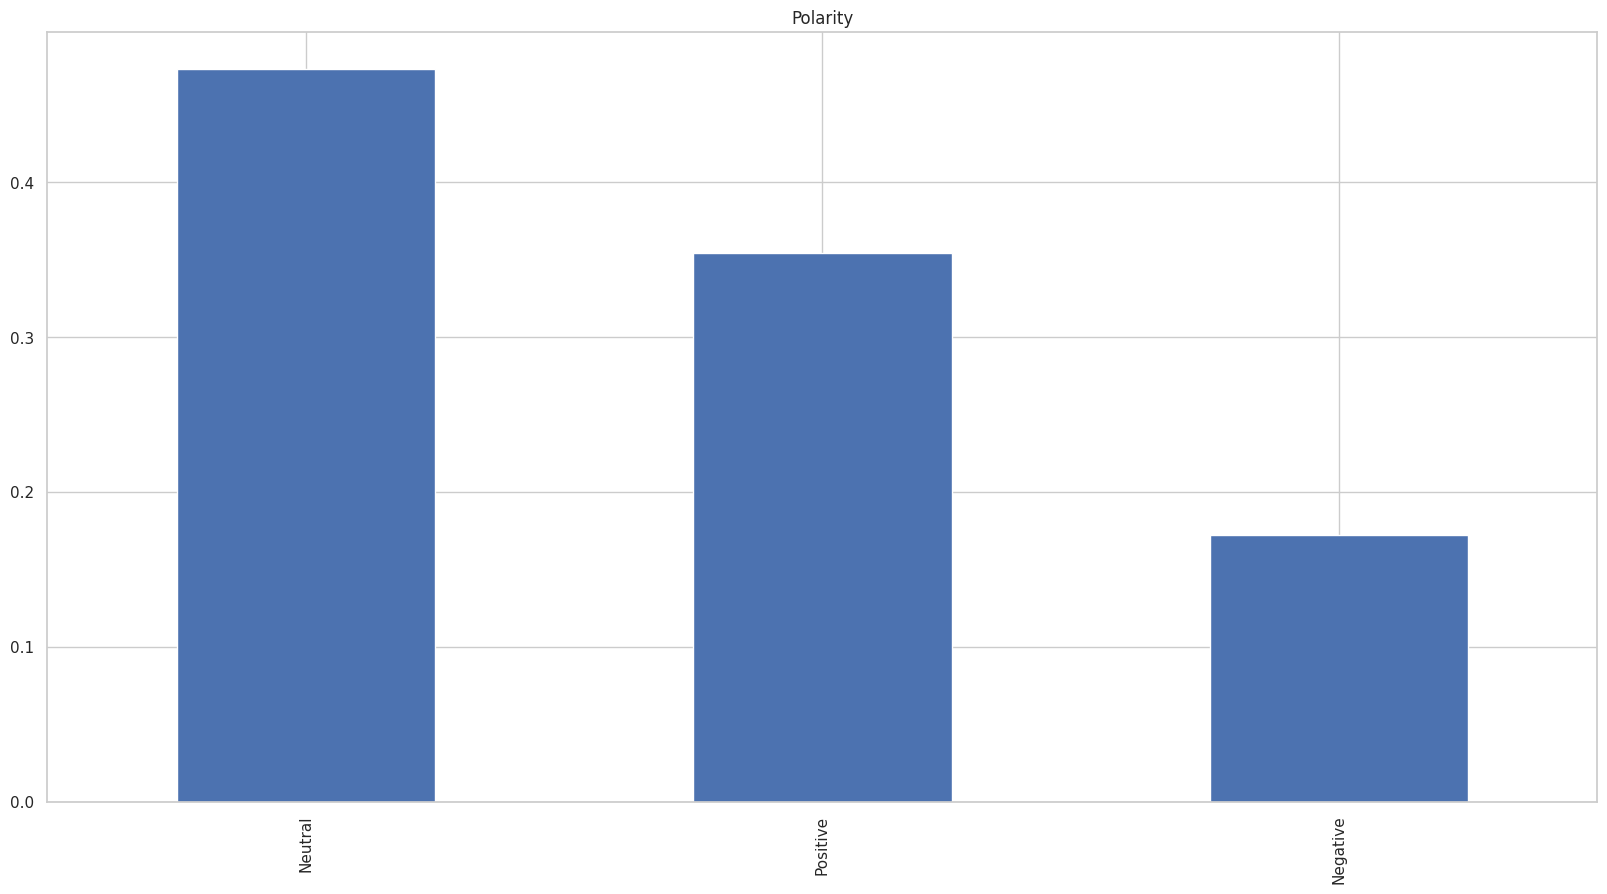

In [ ]:
data_shuffled['Analysis'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Polarity')
plt.show()

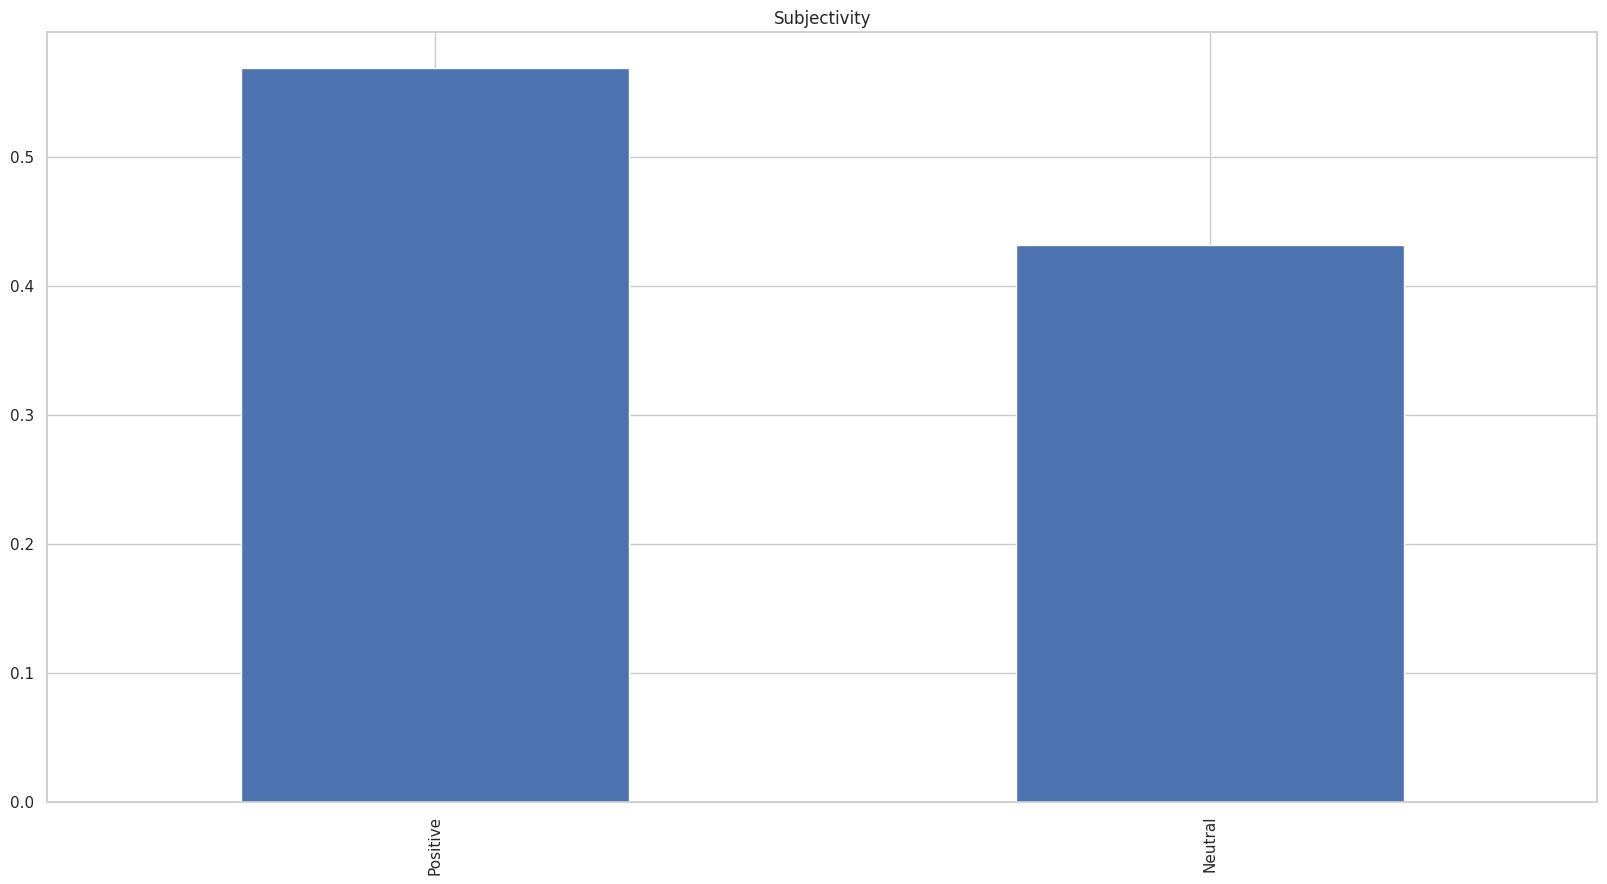

In [ ]:
data_shuffled['Sub_Analysis'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Subjectivity')
plt.show()

In [ ]:
#Percentage of Positive tweet
positive = data_shuffled[data_shuffled["Analysis"] == "Positive"]
positive = positive["Translation"]
print((positive.shape[0]/data_shuffled.shape[0])*100)

35.43333333333333


In [ ]:
#Percentage of Negative Tweet
negative = data_shuffled[data_shuffled["Analysis"] == "Negative"]
positive = negative["Translation"]
print((negative.shape[0]/data_shuffled.shape[0])*100)

17.233333333333334


In [ ]:
#Percentage of Neutral Tweet
neutral = data_shuffled[data_shuffled["Analysis"] == "Neutral"]
neutral = neutral["Translation"]
print((neutral.shape[0]/data_shuffled.shape[0])*100)

47.333333333333336


In [ ]:
#Percentage of Positive subjectivity
positive = data_shuffled[data_shuffled["Sub_Analysis"] == "Positive"]
positive = positive["Translation"]
print((positive.shape[0]/data_shuffled.shape[0])*100)

56.833333333333336


In [ ]:
#Percentage of Neutral subjectivity
positive = data_shuffled[data_shuffled["Sub_Analysis"] == "Neutral"]
positive = positive["Translation"]
print((positive.shape[0]/data_shuffled.shape[0])*100)

43.166666666666664


### Words Cloud

In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

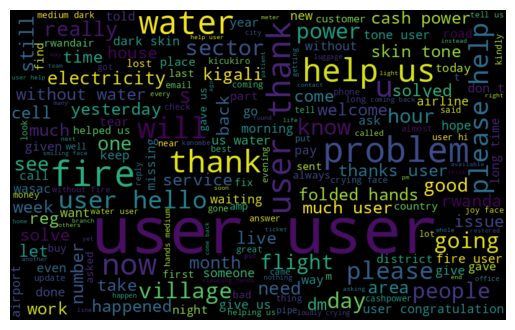

In [ ]:
allwords = ' '.join([tweet for tweet in data_shuffled["Translation"]])
wordcloud = WordCloud(height=500,width=800,background_color="black").generate(allwords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

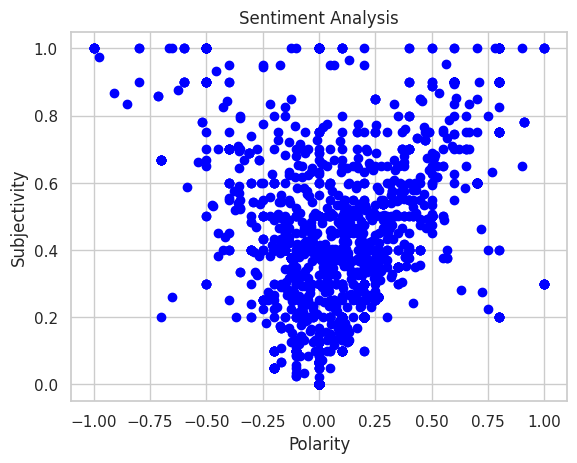

In [ ]:
for i in range(0, data_shuffled.shape[0]):
   plt.scatter(data_shuffled["Polarity"][i], data_shuffled["Subjectivity"][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# Topic Modeling

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 33.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
# To import nltk to remove stopwords
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
# To import gensim for topic modelling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# To import spacy for lemmatization
import spacy

# To import matplotlib and pyLDAvis to visualise the topic modelling results
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Tokenization

In [ ]:
import pandas as pd

# assuming your data is stored in a pandas DataFrame called df
def content_to_words(tweet_content):
    for tweet in tweet_content:
        yield(gensim.utils.simple_preprocess(str(tweet), deacc=True))

tweet_words = list(content_to_words(data_shuffled['Translation']))

print(tweet_words[10:20])


[['user', 'the', 'former', 'gregoire', 'kayibanda', 'international', 'airport', 'was', 'later', 'renovated', 'and', 'given', 'more', 'capacity', 'than', 'the', 'work', 'completed', 'in', 'smiling', 'face', 'with', 'sunglasses'], ['user', 'user', 'user', 'user', 'we', 'thank', 'you', 'and', 'look', 'forward', 'to', 'it', 'because', 'you', 'always', 'wish', 'us', 'the', 'best'], ['user', 'out'], ['user', 'user', 'and', 'how', 'about', 'nyarugunga', 'no', 'electricity', 'from', 'pm', 'up', 'to', 'now'], ['user', 'mwiwere', 'more', 'than', 'an', 'hour', 'ago', 'in', 'kigarama', 'sector', 'in', 'kikiro', 'district', 'we', 'have', 'no', 'fire', 'please', 'help', 'us'], ['user', 'thx'], ['user', 'congratulations', 'user', 'thumbs', 'up', 'may', 'god', 'be', 'with', 'always', 'folded', 'hands'], ['user', 'hi', 'am', 'departing', 'nairobi', 'to', 'kigali', 'next', 'week', 'which', 'test', 'should', 'take', 'in', 'kenya', 'rapid', 'or', 'pcr', 'test', 'pls', 'advice'], ['user', 'some', 'parts', 

### Creating model to identify bigrams and trigrams

In [ ]:
bigram = gensim.models.Phrases(tweet_words, min_count = 5, threshold = 100)
trigram = gensim.models.Phrases(bigram[tweet_words], threshold = 100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

for word in trigram_mod[bigram_mod[tweet_words[10:20]]]:
    print(word)

['user', 'the', 'former', 'gregoire', 'kayibanda', 'international_airport', 'was', 'later', 'renovated', 'and', 'given', 'more', 'capacity', 'than', 'the', 'work', 'completed', 'in', 'smiling', 'face', 'with', 'sunglasses']
['user', 'user', 'user', 'user', 'we', 'thank', 'you', 'and', 'look', 'forward', 'to', 'it', 'because', 'you', 'always', 'wish', 'us', 'the', 'best']
['user', 'out']
['user', 'user', 'and', 'how', 'about', 'nyarugunga', 'no', 'electricity', 'from', 'pm', 'up', 'to', 'now']
['user', 'mwiwere', 'more_than', 'an_hour', 'ago', 'in', 'kigarama', 'sector', 'in', 'kikiro', 'district', 'we', 'have', 'no', 'fire', 'please', 'help', 'us']
['user', 'thx']
['user', 'congratulations', 'user', 'thumbs_up', 'may', 'god', 'be', 'with', 'always', 'folded_hands']
['user', 'hi', 'am', 'departing', 'nairobi', 'to', 'kigali', 'next', 'week', 'which', 'test', 'should', 'take', 'in', 'kenya', 'rapid', 'or', 'pcr', 'test', 'pls', 'advice']
['user', 'some', 'parts', 'of', 'kanombe', 'nyarug

Cleaning tokenized words

In [ ]:
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves','will','say','set',
              'go','may','come','see']

In [ ]:
for word in list(tweet_words):  # iterating on a copy since removing will mess things up
    if word in STOP_WORDS:
        tweet_words.remove(word)

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_STOP_WORDS(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in STOP_WORDS] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# To remove stopwords
tweet_words_nostopword = remove_STOP_WORDS(tweet_words)

# To form bigrams
tweet_words_bigrams = make_bigrams(tweet_words_nostopword)

nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

# To lematize while keeping only nouns, adjectives, verbs and adverbs
tweet_lemmatized = lemmatization(tweet_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(tweet_lemmatized[10:20])

[['user', 'former', 'gregoire', 'later', 'renovate', 'give', 'capacity', 'work', 'complete', 'smile', 'face', 'sunglass'], ['user', 'user', 'user', 'user', 'thank', 'look', 'forward', 'always', 'wish', 'good'], ['user'], ['user', 'user', 'nyarugunga', 'electricity', 'pm', 'now'], ['hour', 'ago', 'sector', 'fire', 'help'], ['user'], ['user', 'congratulation', 'user', 'thumb', 'always', 'folded_hand'], ['kigali', 'next', 'week', 'test', 'take', 'rapid', 'pcr', 'test', 'advice'], ['user', 'part', 'nyarugunga', 'miss', 'fire', 'help', 'fast'], ['user', 'sure', 'fire', 'user', 'half', 'hour']]


Creating inputs for the LDA topic model

In [ ]:
id2word = corpora.Dictionary(tweet_lemmatized)

texts = tweet_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[10:20])

[[(2, 1), (19, 1), (21, 1), (22, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(2, 4), (18, 1), (30, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(2, 1)], [(2, 2), (46, 1), (47, 1), (48, 1), (49, 1)], [(16, 1), (31, 1), (50, 1), (51, 1), (52, 1)], [(2, 1)], [(2, 2), (42, 1), (53, 1), (54, 1), (55, 1)], [(56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1)], [(2, 1), (16, 1), (31, 1), (48, 1), (64, 1), (65, 1), (66, 1)], [(2, 2), (16, 1), (51, 1), (67, 1), (68, 1)]]


Building topic model and find the optimal number of topics for LDA

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, update_every=1, chunksize=2000, passes=20, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tweet_lemmatized, start=2, limit=40, step=6)

In [ ]:
# To print the coherence scores to determine the highest coherence value 
for m, cv in zip(model_list, coherence_values):
    print("Nummber of Topics =", m, " has Coherence Value of", round(cv, 4))

Nummber of Topics = LdaModel<num_terms=2764, num_topics=2, decay=0.5, chunksize=2000>  has Coherence Value of 0.3699
Nummber of Topics = LdaModel<num_terms=2764, num_topics=8, decay=0.5, chunksize=2000>  has Coherence Value of 0.3319
Nummber of Topics = LdaModel<num_terms=2764, num_topics=14, decay=0.5, chunksize=2000>  has Coherence Value of 0.4437
Nummber of Topics = LdaModel<num_terms=2764, num_topics=20, decay=0.5, chunksize=2000>  has Coherence Value of 0.4053
Nummber of Topics = LdaModel<num_terms=2764, num_topics=26, decay=0.5, chunksize=2000>  has Coherence Value of 0.4228
Nummber of Topics = LdaModel<num_terms=2764, num_topics=32, decay=0.5, chunksize=2000>  has Coherence Value of 0.4104
Nummber of Topics = LdaModel<num_terms=2764, num_topics=38, decay=0.5, chunksize=2000>  has Coherence Value of 0.4273


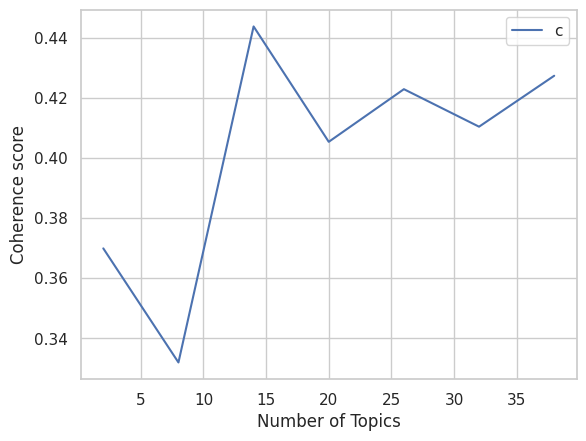

In [ ]:
# To plot a graph showing the coherence scores against number of topics
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=100, update_every=1, chunksize=2000, passes=20)

Visualising Topic Modeling with pyLDAvis

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.141057  0.133948       1        1  21.350357
1     -0.138427 -0.039945       2        1  18.294665
3     -0.178852  0.054652       3        1  11.972416
4     -0.027916  0.094969       4        1  10.859671
9     -0.027157 -0.246945       5        1   8.533316
2      0.048054  0.005092       6        1   8.496465
8     -0.055916 -0.076291       7        1   6.352963
5      0.207738  0.083989       8        1   6.039660
7      0.094139  0.006363       9        1   4.707240
6      0.219395 -0.015830      10        1   3.393247, topic_info=       Term         Freq        Total Category  logprob  loglift
18    thank   489.000000   489.000000  Default  30.0000  30.0000
102   water   409.000000   409.000000  Default  29.0000  29.0000
2      user  5306.000000  5306.000000  Default  28.0000  28.0000
19     face   187.000000   187.000000  Default  27.0000  27.0000
16     fire   392.000000   392.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
253    area     5.267614    59.792683  Topic10  -5.0742   0.9541
70     come     5.350279    97.502801  Topic10  -5.0586   0.4807
78     know     5.314607   119.951817  Topic10  -5.0653   0.2668
57   kigali     4.929032    34.582659  Topic10  -5.1406   1.4352
184     ask     4.767730    85.667524  Topic10  -5.1739   0.4948

[609 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1648     10  0.921982   accident
91        9  0.819208    account
1457     10  0.789647     action
310       7  0.765937        add
2278      5  0.843439      adepr
...     ...       ...        ...
271       7  0.069361  yesterday
271       8  0.034681  yesterday
1836      1  0.781642      young
2414      6  0.876795      youth
1698      9  0.822583       zone

[987 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 10, 3, 9, 6, 8, 7])